In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
# Load the dataset
file_path = 'balanced_hatespeech_dataset.csv'
df = pd.read_csv(file_path) 

# Separate features and target

In [3]:
# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

In [4]:
# Sample a smaller subset of the data for feature selection
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, random_state=42)

In [5]:
# Select the top 20 features using mutual information on the sample
selector = SelectKBest(mutual_info_classif, k=20)
X_sample_new = selector.fit_transform(X_sample, y_sample)

# Transform the full dataset using the fitted selector

In [6]:
# Transform the full dataset using the fitted selector
X_new = selector.transform(X)

# Split the data into training and test sets

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data

In [8]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SGDClassifier as a linear SVM

In [9]:
# Train an SGDClassifier as a linear SVM
model = SGDClassifier(loss='hinge', random_state=42)
model.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

In [10]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6191607284243864


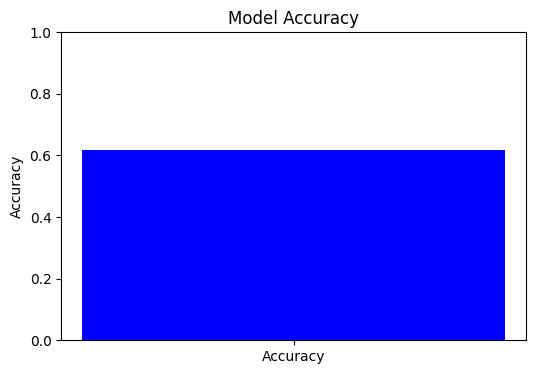

In [12]:
# Plot the accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()